In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure

from Environment_Creator import env_creator, Environments_enum

In [3]:
# Fetch environment
def make_navigation_env():
    return env_creator(Environments_enum.Navigation.value)

# Register and make environment
gym.register(id="SpaceNavigation_v0", entry_point=make_navigation_env)
env = gym.make("SpaceNavigation_v0")

In [4]:
# Configure model
model = DQN(
    "MlpPolicy",  # Uses a Multi-Layer Perceptron (MLP) as the policy
    env,
    learning_rate=5e-4,  # Adjust learning rate for better convergence
    buffer_size=10000,  # Replay buffer size
    learning_starts=500,  # Number of steps before training starts
    batch_size=128,  # Mini-batch size for training
    gamma=0.95,  # Discount factor for future rewards
    target_update_interval=100,  # How often to update target network
    train_freq=10,  # Train every 10 steps
    exploration_fraction=0.3,  # Explore more in the beginning
    verbose=1,  # Print training information
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


To view logs:  
Run `tensorboard --logdir=./logs` in the terminal

In [4]:
# Log training progress
log_dir = "./logs"
new_logger = configure(log_dir, ["stdout", "tensorboard"])
model.set_logger(new_logger)

# Train and save
model.learn(
    total_timesteps=500000,
    log_interval=4
)
model.save("dqn_spacenavigation")

Logging to ./logs
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.2     |
|    ep_rew_mean      | -90.8    |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5562     |
|    time_elapsed     | 0        |
|    total_timesteps  | 349      |
----------------------------------


C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\utils\passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.6     |
|    ep_rew_mean      | -105     |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3021     |
|    time_elapsed     | 0        |
|    total_timesteps  | 749      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.512    |
|    n_updates        | 24       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.8     |
|    ep_rew_mean      | -106     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 2298     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1149     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.455    |
|    n_updates      

KeyboardInterrupt: 

In [5]:
# Load the trained model
model = DQN.load("dqn_spacenavigation")

In [6]:
# Evaluate the agent on 10 episodes
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)
print(f"Mean Reward: {mean_reward} ± {std_reward}")

Mean Reward: 12.712812886340544 ± 0.0


C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\utils\passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [7]:
# Test Episode and Visualize
obs, info = env.reset()
done = False

positions = []  # Store (x, y, z) coordinates
rewards = []    # Store rewards per step
fuel_levels = []  # Store fuel remaining

while not done:
    action, _states = model.predict(obs, deterministic=True)  # Select best action
    action = int(action)  # Ensure integer action
    obs, reward, terminated, truncated, info = env.step(action)

    # Store Data for Visualization
    positions.append(obs[:3])  # Store position (x, y, z)
    rewards.append(reward)
    fuel_levels.append(obs[6])  # Store remaining fuel
    
    print(f"Reward {reward}")  # Print reward
    env.render()  # Print position & fuel

    if terminated or truncated:
        done = True
        print("Episode Finished!")

Reward 0.10454352980189441
Agent Position: [0. 1. 0.], Fuel: 99.0
Reward -0.004227558431253442
Agent Position: [0. 2. 0.], Fuel: 98.0
Reward 0.19938571826398999
Agent Position: [0. 2. 1.], Fuel: 97.0
Reward 0.08930365208620117
Agent Position: [0. 2. 2.], Fuel: 96.0
Reward -0.03687219561669508
Agent Position: [0. 2. 3.], Fuel: 95.0
Reward 0.3845028115948672
Agent Position: [1. 2. 3.], Fuel: 94.0
Reward 0.278461359810823
Agent Position: [2. 2. 3.], Fuel: 93.0
Reward 0.15047861260079998
Agent Position: [3. 2. 3.], Fuel: 92.0
Reward -0.002691783792837299
Agent Position: [3. 2. 4.], Fuel: 91.0
Reward -0.18327175589726608
Agent Position: [3. 2. 5.], Fuel: 90.0
Reward 0.3709090349442956
Agent Position: [3. 3. 5.], Fuel: 89.0
Reward 0.22015587200626463
Agent Position: [4. 3. 5.], Fuel: 88.0
Reward 0.33588714886525395
Agent Position: [4. 4. 5.], Fuel: 87.0
Reward -0.19375152513430294
Agent Position: [4. 4. 6.], Fuel: 86.0
Reward 0.22967038573099252
Agent Position: [5. 4. 6.], Fuel: 85.0
Reward 

#### Results:  
For this experiment the agent is reaching the goal very effectivelly. Reward is given for reaching the final destination and fuel consumption is monitored. Reward is received if the agent gets closer to the target and is penelized if further away. Penalties apply to hitting obstacles and running out of fuel.  
In order to reach more realistics scenarios the environment should be improved and hyperparameters further tunned.  
*Tests were more resource intensive.*

**Initial hyperparameters used for testing:**
```python
DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-3,
    buffer_size=10000,
    learning_starts=500,
    batch_size=64,
    gamma=0.99,
    target_update_interval=100,
    train_freq=4,
    verbose=1,
)
```
**Below are tunned hyperparameters from stable baseline docs for a similiar task:**
```python
DQN(
    policy: 'MlpPolicy'
    n_timesteps: !!float 1e5
    learning_rate: !!float 6.3e-4
    batch_size: 128
    buffer_size: 50000
    learning_starts: 0
    gamma: 0.99
    target_update_interval: 250
    train_freq: 4
    gradient_steps: -1
    exploration_fraction: 0.12
    exploration_final_eps: 0.1
    policy_kwargs: "dict(net_arch=[256, 256])"
)
```
**Latest effective hyperparameters with improved results:**
```python
DQN(
    "MlpPolicy",
    env,
    learning_rate=5e-4,
    buffer_size=10000,
    learning_starts=500,
    batch_size=128,
    gamma=0.95,
    target_update_interval=100,
    train_freq=10,
    exploration_fraction=0.3,
    verbose=1,
)
```

C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.goal to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.goal` for environment variables or `env.get_wrapper_attr('goal')` that will search the reminding wrappers.
  logger.warn(
C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.obstacles to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.obstacles` for environment variables or `env.get_wrapper_attr('obstacles')` that will search the reminding wrappers.
  logger.warn(


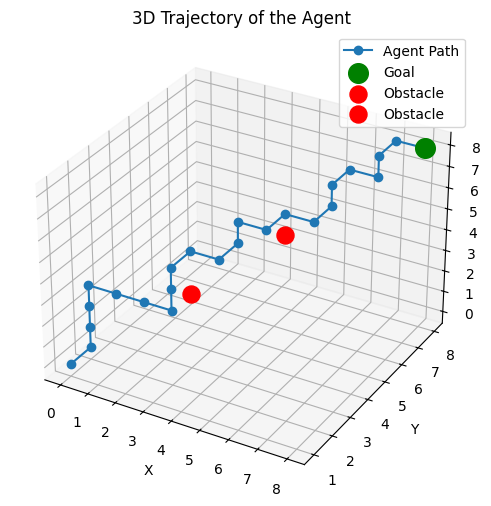

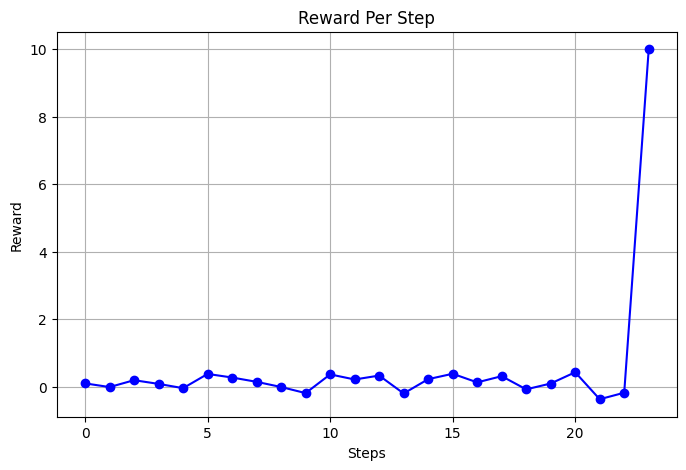

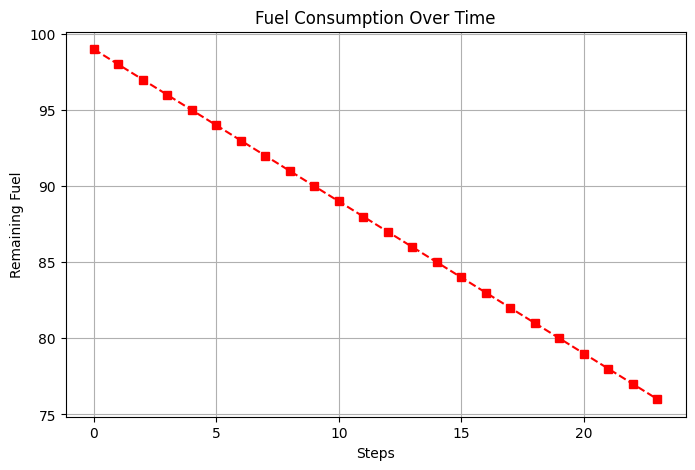

In [10]:
# Convert lists to NumPy arrays
positions = np.array(positions)
fuel_levels = np.array(fuel_levels)

# ----------- PLOTTING ------------

# 3D Trajectory Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], marker='o', label="Agent Path")
ax.scatter(env.goal[0], env.goal[1], env.goal[2], color='green', s=200, label="Goal")  # Goal
for obs in env.obstacles:
    ax.scatter(obs[0], obs[1], obs[2], color='red', s=150, label="Obstacle")  # Obstacles

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Trajectory of the Agent")
ax.legend()
plt.show()

# Reward Per Step Plot
plt.figure(figsize=(8, 5))
plt.plot(rewards, marker='o', linestyle='-', color='blue')
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward Per Step")
plt.grid()
plt.show()

# Fuel Consumption Over Time
plt.figure(figsize=(8, 5))
plt.plot(fuel_levels, marker='s', linestyle='--', color='red')
plt.xlabel("Steps")
plt.ylabel("Remaining Fuel")
plt.title("Fuel Consumption Over Time")
plt.grid()
plt.show()

**To improve the environment we can consider:**  
Movement:
- Introduce continuous movement using velocity and acceleration.
- Apply Newton’s Second Law: $ F = ma $ where force from thrusters changes velocity.
- Add momentum so movement persists unless countered.
- Introduce gravity if near a celestial body.
  
Obstacles:
- Irregular-shaped asteroids (bounding boxes or convex hulls).
- Moving obstacles (asteroids or debris traveling with velocity).
- Gravity wells (black holes or planetary gravity altering paths).
  
Anomalies:
- Fuel leaks: Randomized decrease in fuel.
- Sensor noise: Small noise added to state observations.
- Thruster failures: Certain actions may not work sometimes.

Sensors:
- Limited field of view: The agent only knows nearby objects.
- Lidar-style sensing: Returns distances to nearby objects.
- Radar-based goal detection: The goal’s direction is known, but not distance.


**To improve the reward we can consider:**  
- Reward efficient movement: Penalize unnecessary thrusts.
- Encourage proximity to the goal: Small positive reward for getting closer.
- Add time pressure: Slight penalty per step to encourage efficiency.

In [2]:
# Fetch v2 environment
def make_navigation_env():
    return env_creator(Environments_enum.Navigation_v2.value)

# Register and make environment
gym.register(id="SpaceNavigation_v1", entry_point=make_navigation_env)
env = gym.make("SpaceNavigation_v1")

In [3]:
# Configure model
model = DQN(
    "MlpPolicy",  # Uses a Multi-Layer Perceptron (MLP) as the policy
    env,
    learning_rate=5e-4,  # Adjust learning rate for better convergence
    buffer_size=10000,  # Replay buffer size
    learning_starts=500,  # Number of steps before training starts
    batch_size=128,  # Mini-batch size for training
    gamma=0.95,  # Discount factor for future rewards
    target_update_interval=100,  # How often to update target network
    train_freq=10,  # Train every 10 steps
    exploration_fraction=0.3,  # Explore more in the beginning
    verbose=1,  # Print training information
    device='cuda'
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [4]:
# Log training progress
log_dir = "./logs"
new_logger = configure(log_dir, ["stdout", "tensorboard"])
model.set_logger(new_logger)

# Train and save
model.learn(
    total_timesteps=500000,
    log_interval=4
)
model.save("dqn_spacenavigation_v2")

Logging to ./logs
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -170     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5275     |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
----------------------------------


C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\utils\passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -166     |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1989     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.52     |
|    n_updates        | 29       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -160     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 2251     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1200     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.31     |
|    n_updates      

In [5]:
# Load the trained model
model = DQN.load("dqn_spacenavigation_v2")

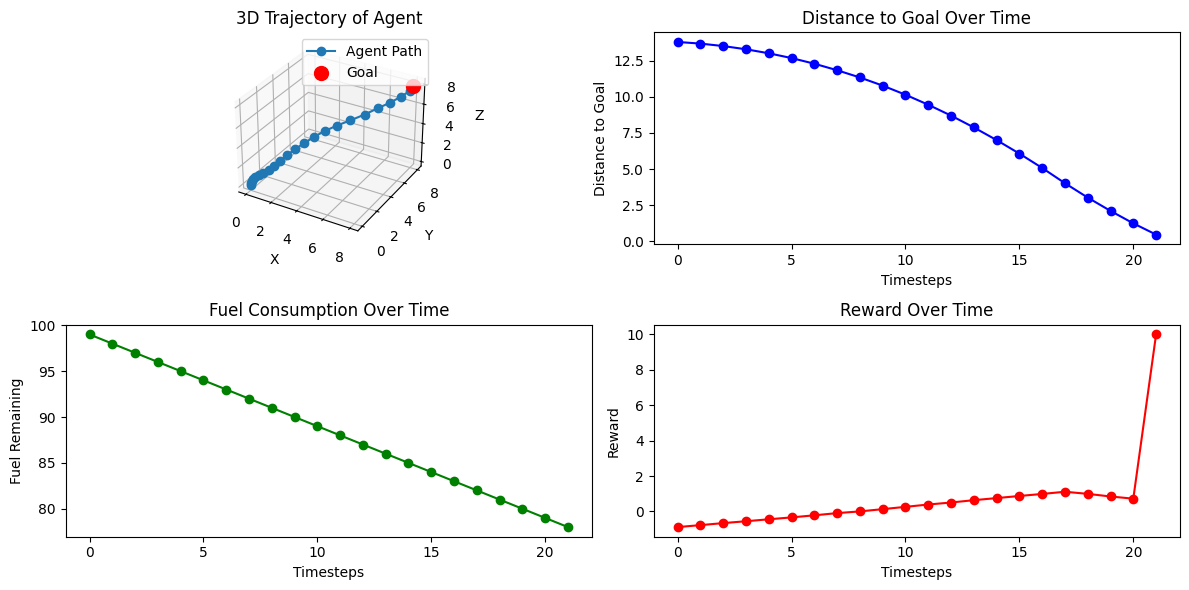

In [11]:
obs, info = env.reset()
done = False

# Store data for plotting
positions = []   # (x, y, z)
distances = []   # Distance to goal
fuels = []       # Fuel remaining
rewards = []     # Reward per step
timesteps = []   

t = 0  # Track time steps
while not done:
    action, _states = model.predict(obs, deterministic=True)  # Select best action
    obs, reward, done, _, _ = env.step(int(action))

    # Extract position and fuel
    x, y, z, vx, vy, vz, fuel = obs

    # Compute distance to goal
    distance_to_goal = np.linalg.norm(np.array([x, y, z]) - env.goal)

    # Store data
    positions.append((x, y, z))
    distances.append(distance_to_goal)
    fuels.append(fuel)
    rewards.append(reward)
    timesteps.append(t)

    t += 1

env.close()

# Convert position list to separate x, y, z lists
x_vals, y_vals, z_vals = zip(*positions)

# --- 1. Plot 3D Trajectory ---
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(221, projection='3d')
ax.plot(x_vals, y_vals, z_vals, marker='o', linestyle='-', label='Agent Path')
ax.scatter(*env.goal, color='red', s=100, label='Goal')  # Goal position
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Trajectory of Agent")
ax.legend()

# --- 2. Distance to Goal Over Time ---
ax2 = fig.add_subplot(222)
ax2.plot(timesteps, distances, marker='o', linestyle='-', color='b')
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Distance to Goal")
ax2.set_title("Distance to Goal Over Time")

# --- 3. Fuel Consumption Over Time ---
ax3 = fig.add_subplot(223)
ax3.plot(timesteps, fuels, marker='o', linestyle='-', color='g')
ax3.set_xlabel("Timesteps")
ax3.set_ylabel("Fuel Remaining")
ax3.set_title("Fuel Consumption Over Time")

# --- 4. Reward Over Time ---
ax4 = fig.add_subplot(224)
ax4.plot(timesteps, rewards, marker='o', linestyle='-', color='r')
ax4.set_xlabel("Timesteps")
ax4.set_ylabel("Reward")
ax4.set_title("Reward Over Time")

# Show plots
plt.tight_layout()
plt.show()